In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
X_data = np.loadtxt("data/X_data.csv", delimiter=",")
X_data.shape

(1000, 38400)

In [3]:
X_data

array([[  0.28048742,   3.72830677,   3.19126654, ..., -45.90468216,
        -45.90468216, -42.39907837],
       [ -2.58110476,  13.3120842 ,   2.01552916, ..., -49.64926147,
        -49.64926147, -37.44506454],
       [ -2.15358114,  -7.61195707,  -4.13224602, ..., -50.49839783,
        -50.49839783, -35.67107391],
       ...,
       [-15.86331844, -12.50350857, -28.52645874, ..., -58.88102722,
        -58.88102722, -31.27197647],
       [ -4.51956177,  -9.57658386,  -3.12049174, ..., -54.87487793,
        -54.87487793, -51.62145996],
       [-21.03319359, -23.70036888, -20.64584732, ..., -60.84477997,
        -60.84477997, -60.84477997]])

In [4]:
y_data = np.loadtxt("data/y_data.csv", dtype=str)
y_data.shape

(1000,)

In [5]:
y_data

array(['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blu

In [6]:
labels = np.unique(y_data)
labels

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype='<U9')

In [7]:
y_data2 = np.zeros((y_data.shape[0], len(labels)))

for i, label in enumerate(labels):
    for j in range(y_data.shape[0]):
        if y_data[j] == label:
            y_data2[j][i] = 1
            
y_data2

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [8]:
X_data2 = X_data.reshape(1000, 128, 300)
X_data2

array([[[  0.28048742,   3.72830677,   3.19126654, ...,   6.14212751,
          -1.98371422,  12.92064667],
        [  3.10127735,  14.22969437,  11.79866219, ...,  10.4456377 ,
           5.20716858,  15.11762428],
        [ -4.39976215,  10.78109169,  12.30222225, ...,  -0.17950238,
           6.4920702 ,  13.78956223],
        ...,
        [-45.90468216, -45.90468216, -45.90468216, ..., -45.90468216,
         -45.90468216, -42.06035614],
        [-45.90468216, -45.90468216, -45.90468216, ..., -45.90468216,
         -45.90468216, -42.29415131],
        [-45.90468216, -45.90468216, -45.90468216, ..., -45.90468216,
         -45.90468216, -42.39907837]],

       [[ -2.58110476,  13.3120842 ,   2.01552916, ...,   0.45536363,
          12.62303734,   9.48605347],
        [ -1.35699916,  24.61754227,  13.61273861, ...,   8.17651463,
          18.54008102,  16.74104881],
        [ -7.55361128,  19.53930855,  14.08666611, ...,   8.84458733,
          11.41815948,  13.66756248],
        ...,


In [9]:
X_data2 = X_data2.reshape(1000, 128, 300, 1)
X_data2.shape

(1000, 128, 300, 1)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data2, y_data2, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 128, 300, 1)
(200, 128, 300, 1)
(800, 10)
(200, 10)


In [11]:
def conv_block(x, n_filters,filter_size=(3, 3), pool_size=(2, 2),stride=(1, 1)):
    x = keras.layers.Conv2D(n_filters, filter_size, strides=(1, 1), padding='same')(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.MaxPooling2D(pool_size=pool_size, strides=stride)(x)
    x = keras.layers.Dropout(0.4)(x)
    return x

In [12]:
nn_input = keras.Input(shape=(128,300,1))

In [13]:
x = conv_block(nn_input, 16,stride=(2,2))
x = conv_block(x, 32,filter_size=(3,3),stride=(2,2))
x = conv_block(x, 64, stride=(2,2))
x = conv_block(x, 128,filter_size=(3,3),stride=(2,2))
x = conv_block(x, 256,stride=(2,2))

x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(128, activation='relu', 
          kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = keras.layers.Dropout(0.3)(x)
predictions = keras.layers.Dense(len(labels), 
                        activation='softmax', 
                        kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    
model = keras.Model(inputs=nn_input, outputs=predictions)

In [14]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 300, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 300, 16)      160       
_________________________________________________________________
activation (Activation)      (None, 128, 300, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 150, 16)       0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 150, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 150, 32)       4640      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 150, 32)      

In [15]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [16]:
X_train.shape

(800, 128, 300, 1)

In [17]:
y_train.shape

(800, 10)

In [18]:
epochs=100

for epoch in range(epochs):

    history = model.fit(
      X_train,
      y_train,
      epochs=1, 
      batch_size=32,
      validation_split=0.10
        )

23/23 [==============================] - 35s 2s/step - loss: 1.5028 - accuracy: 0.6764 - val_loss: 1.7210 - val_accuracy: 0.6375


23/23 [==============================] - 35s 2s/step - loss: 1.2608 - accuracy: 0.7778 - val_loss: 1.5504 - val_accuracy: 0.6875


In [19]:
model.save("models/model30sec-2")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/model30sec-1\assets


In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))

val_loss = 1.677 and val_acc = 0.670


In [36]:
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred

(200, 10)


array([[1.05186880e-01, 1.99811868e-02, 1.15453206e-01, ...,
        2.36385558e-02, 6.12613522e-02, 2.89175779e-01],
       [3.83705914e-01, 1.45783543e-03, 2.41829798e-01, ...,
        6.76902430e-03, 9.53103453e-02, 2.11452603e-01],
       [2.19309226e-01, 1.60950620e-03, 3.59956268e-03, ...,
        1.42870750e-03, 2.24957876e-02, 1.31232098e-01],
       ...,
       [5.65865230e-05, 2.42503793e-05, 3.04598211e-06, ...,
        5.48736677e-02, 3.61276828e-02, 5.97560254e-04],
       [7.07928836e-03, 1.12543744e-03, 1.22015807e-03, ...,
        1.99559089e-02, 2.32545137e-01, 3.91258784e-02],
       [7.94460997e-02, 4.02496522e-03, 4.52731848e-02, ...,
        6.16610935e-03, 4.95408401e-02, 2.26426065e-01]], dtype=float32)

In [44]:
y_classes = y_pred.argmax(1)
y_classes[:15]

array([9, 0, 6, 7, 7, 9, 2, 4, 9, 7, 2, 6, 8, 9, 1], dtype=int64)

In [45]:
y_test2 = y_test.argmax(1)
y_test2[:15]

array([6, 2, 6, 7, 7, 0, 7, 4, 0, 7, 9, 6, 7, 3, 1], dtype=int64)

In [50]:
import sklearn.metrics as mt
accuracy = mt.accuracy_score(y_test2, y_classes)
accuracy

0.67

In [52]:
precision = mt.precision_score(y_test2, y_classes, average = "macro")
precision

0.6992799547068996

In [53]:
recall = mt.recall_score(y_test2, y_classes, average = "macro")
recall

0.681141774891775

In [54]:
f1_score = mt.f1_score(y_test2, y_classes, average = "macro")
f1_score

0.6700900074086128

In [56]:
cm = mt.confusion_matrix(y_test2, y_classes)
print(cm)

[[ 7  0  1  1  1  3  0  0  3  5]
 [ 0 13  1  0  0  2  0  0  0  0]
 [ 1  0 17  0  0  0  0  0  0  4]
 [ 0  0  4 10  1  0  0  4  1  4]
 [ 0  0  0  0 15  0  1  1  1  0]
 [ 0  0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  1  0 20  0  0  3]
 [ 0  1  2  0  1  0  0 15  1  1]
 [ 0  0  0  0  2  0  0  1 10  1]
 [ 0  1  6  4  0  0  0  1  1  8]]


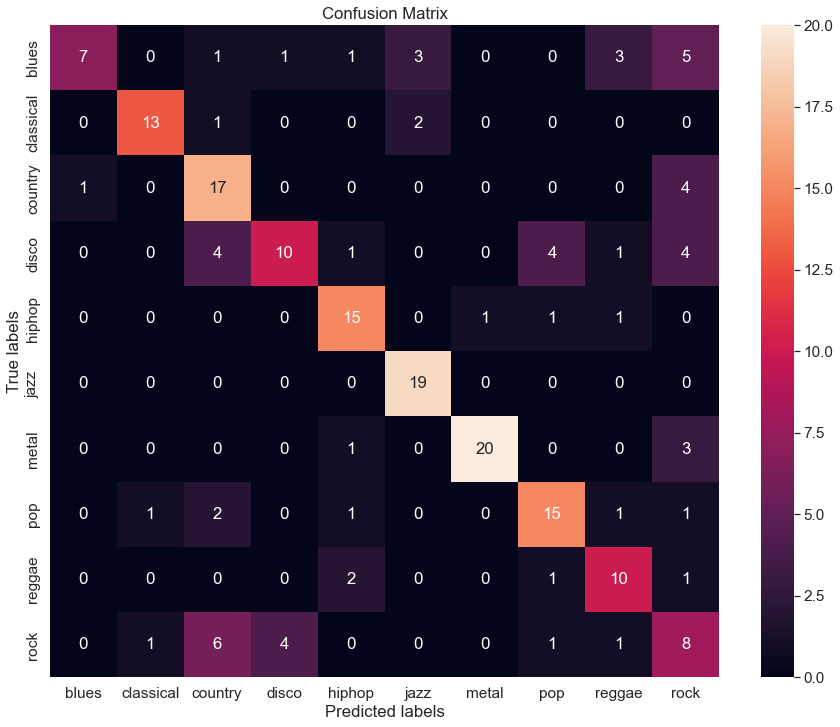

In [61]:
plt.figure(figsize=(15,12))
ax= plt.subplot()
sn.heatmap(cm, annot=True, fmt='g', ax=ax);  # annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);